In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
import warnings
warnings.filterwarnings('always')
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline

In [3]:
def svm(X_train, X_test, y_train, y_test):
    clf = SVC(kernel = 'linear', gamma='auto')
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    return "SVM Test Classifier Accuracy: " + str(metrics.accuracy_score(y_test, y_predict) * 100) + "\nF1 Score for SVM Classifier: " +  str(f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))) + "\n Jaccard Similarity for SVM Classifier: " + str( jaccard_score(y_test, y_predict, average='macro'))

In [4]:
def rf(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=1000, max_depth = 50, random_state=0)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    #Random Forest Classifier Test Accuracy
    return "Random Forest Classifier Test Accuracy: " + str(metrics.accuracy_score(y_test, y_predict) * 100) + "\nF1 Score for Random Forest Classifier: " +  str(f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))) + "\n Jaccard Similarity for Random Forest Classifier: " + str( jaccard_score(y_test, y_predict, average='macro'))

<h3>Loading Data</h3>

In [5]:
df = pd.read_csv("Dataset.csv")
y = df['Label']
df = df.drop(['Label'], axis=1)

<h3>Approach 1 : Training a Classification Model Without Dimensionality Reduction</h3>


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, shuffle = True)
print(svm(X_train, X_test, y_train, y_test))
print("------------------------------------------")
print(rf(X_train, X_test, y_train, y_test))

SVM Test Classifier Accuracy: 96.25
F1 Score for SVM Classifier: 0.9638888888888889
 Jaccard Similarity for SVM Classifier: 0.9363636363636363
------------------------------------------


<h3>Training with K fold Cross Validation and computing the validation score</h3>

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, shuffle = True)
clf = SVC(kernel = 'linear', gamma='auto')
clf.fit(X_train, y_train)
print(cross_val_score(clf, X_train, y_train, cv = 3))  


[0.98305085 0.97272727 0.93478261]


<h3>Approach 2 : Training a Classification Model With Dimensionality Reduction</h3>


<h4>The Elbow Curve of Number of Principal Components Vs Explained Variance Ration</h4>

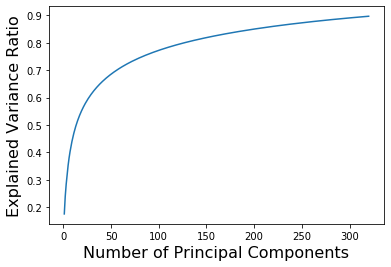

In [8]:
components = list(range(1,321))
explained_variance = list()
for _ in components:
    pca = PCA(n_components = _)
#     print("Fitting PCA for " + str(_) + " principal components")
#     print("-----------------------------------------------------")
    pca.fit_transform(df.values)
    cumsum = np.mean(np.cumsum(pca.explained_variance_ratio_))
    explained_variance.append(cumsum)
plt.plot(components, explained_variance)
plt.xlabel('Number of Principal Components', fontsize=16)
plt.ylabel('Explained Variance Ratio', fontsize=16)
plt.show()

In [7]:
pca = PCA()
pca.fit(df.values)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

pca = PCA(n_components = d)
X = pca.fit_transform(df.values)
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X, y.values, test_size = 0.2, shuffle = True)

In [ ]:
print(svm(X_train_reduced, X_test_reduced, y_train, y_test))
print("-------------------------------------------------------")
print(rf(X_train_reduced, X_test_reduced, y_train, y_test))

<h3>Summary</h3>

<table style = "width:100%">
  <tr>
      <th>Method</th>  
      <th>Classifier</th>
    <th>Accuracy</th>
    <th>F1 Score</th>
    <th>Jaccard Similarity</th>
  </tr>
    <tr>
        <td>Training a Classification Model Without Dimensionality Reduction</td>
        <td>SVM</td>
        <td>95</td>
        <td>0.947</td>
        <td>0.928</td>
    </tr>
         <tr>
        <td>Training a Classification Model With Dimensionality Reduction</td>
             <td>SVM</td>
        <td>97.5</td>
        <td>0.974</td>
        <td>0.971</td>
    </tr>
     <tr>
        <td>Training a Classification Model Without Dimensionality Reduction</td>
        <td>Random Forest</td>
        <td>96.25</td>
        <td>0.964</td>
        <td>0.949</td>
    </tr>
        <tr>
        <td>Training a Classification Model With Dimensionality Reduction</td>
             <td>Random Forest</td>
        <td>93.75</td>
        <td>0.931</td>
        <td>0.923</td>
    </tr> 
        </table>

<h3>Class Wise Classification Metrics</h3>

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=0)
sss.get_n_splits(df, y)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
# X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, shuffle = True)
clf = SVC(kernel = 'linear', gamma='auto')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
labels = [i for i in range(1,41)]
print(classification_report(y_test, y_pred, labels=labels))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       0.67      1.00      0.80         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         2
          18       1.00    